In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import sklearn

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

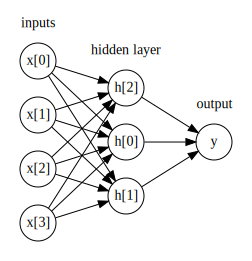

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

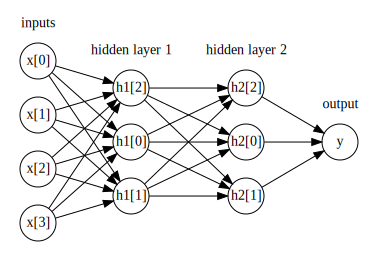

In [4]:
mglearn.plots.plot_two_hidden_layer_graph()

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

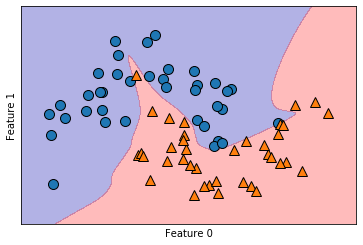

In [5]:
from sklearn.neural_network import MLPClassifier#多层感知机
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[100,100],activation='tanh',alpha=0.001)
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [5]:
y_test

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

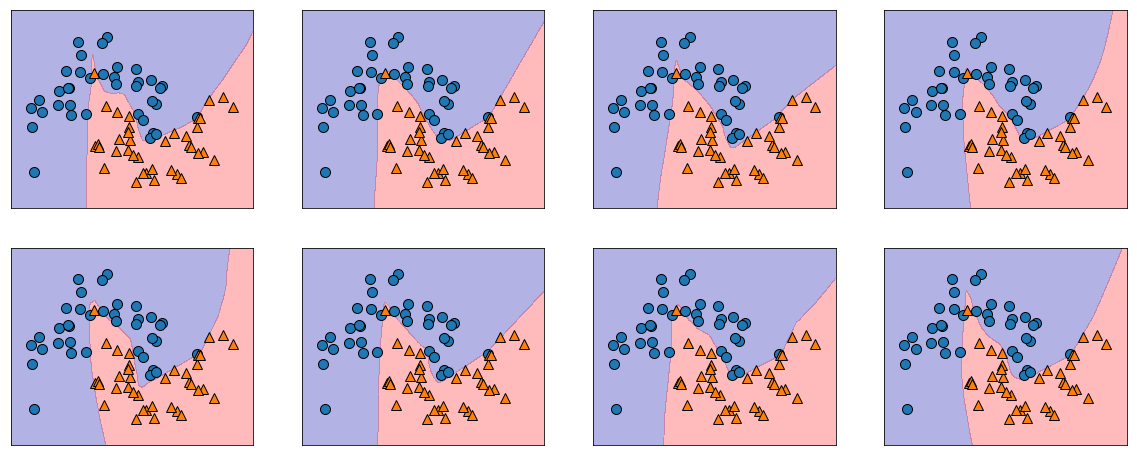

In [13]:
fig,axes = plt.subplots(2,4,figsize=(20,8))
for i,ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs',random_state=i,hidden_layer_sizes=[100,100])
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3,ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)

In [7]:
from sklearn.datasets import load_breast_cancer#导入数据
cancer = load_breast_cancer()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=42,max_iter=1000,alpha=1)
mlp.fit(X_train_scaled,y_train)
print("训练集精度：{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("测试集精度：{:.3f}".format(mlp.score(X_test_scaled,y_test)))

训练集精度：0.986
测试集精度：0.972
